In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import nltk

from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.utils import to_categorical

data = pd.read_excel('/content/drive/MyDrive/NewsComments/Dataset/news_comments.xlsx')  

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import nltk

from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.utils import to_categorical

#reading excel files
data_train = pd.read_excel('/content/drive/MyDrive/NewsComments/Dataset/news_comments.xlsx')
data_test = pd.read_excel('/content/drive/MyDrive/NewsComments/Dataset/news_comments.xlsx')             

#train_test split
x_train, y_train = data_train['Data'].values, data_train['Class'].values
x_test, y_test = data_test['Data'].values, data_test['Class'].values

In [ ]:
data = data_train.append(data_test, ignore_index=True)

class_names = ['Positive','Very Positive', 'Negative', 'Very Negative', 'Neutral']

print('size of training set: %s' % (len(data_train['Data'])))
print('size of validation set: %s' % (len(data_test['Data'])))
print(data.Class.value_counts())

data.head(5)

size of training set: 13802
size of validation set: 13802
Very Negative    7856
Negative         6396
Neutral          5902
Very Positive    4560
Positive         2890
Name: Class, dtype: int64


,SL,Data,Class
0,0.0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,Negative
1,1.0,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,Negative
2,2.0,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,Very Negative
3,3.0,চুরি নয় লুটপাট।,Very Negative
4,4.0,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,Neutral


In [ ]:
def clean_text(data):
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    data = re.sub(bangla_digits, " ", data)
    data = re.sub(punc, " ", data)
    data = re.sub(english_chars, " ", data)
    data = re.sub(bangla_fullstop, " ", data)
    data = re.sub(punctSeq, " ", data)
    data = whitespace.sub(" ", data).strip()
    
    data = re.sub(r'https?:\/\/.*[\r\n]*', '', data, flags=re.MULTILINE)
    data = re.sub(r'\<a href', ' ', data)
    data = re.sub(r'&amp;‘:‘ ’', '', data) 
    data = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', data)
    data = re.sub(r'<br />', ' ', data)
    data = re.sub(r'\'', ' ', data)
    data = re.sub(r"[\@$#%~+-\.\'।\"]"," ",data)
    data = re.sub(r"(?m)^\s+", "", data)
    data = re.sub("[()]","",data)
    data = re.sub("[‘’]","",data)
    data = re.sub("[!]","",data)
    data = re.sub("[/]","",data)
    data = re.sub("[:]","",data)
    data= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',data)
    data= data.strip("/")
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    data = word_tokenize(data)
    
    return data

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
texts = [' '.join(clean_text(text)) for text in data.Data]

texts_train = [' '.join(clean_text(text)) for text in x_train]
texts_test = [' '.join(clean_text(text)) for text in x_test]

print(texts_train[50])

যারা লুট পাট করেছে তাদেরকে তিনি চিনেন এবং ভালো করে চিনেন কিন্তু কেনো কোনো ব্যবস্থা নিচ্ছেন না বা নিতে পারছেন না তা বলেননি ফার্মাস ব্যাংক তারপরও চলবে উনি কী এখানেও জনগণের টাকা থেকে জোগান দিয়ে চালু রাখবেন এর পরও বলবেন ওনাদের অর্থব্যবস্থাপনা স্বচ্ছ ওনরা জবাবদিহিতায় আছেন


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(texts)

#converting text into integer sequences
x_train_seq  = tokenizer.texts_to_sequences(texts_train) 
x_test_seq = tokenizer.texts_to_sequences(texts_test)

#padding to prepare sequences of same length
x_train_seq  = pad_sequences(x_train_seq, maxlen=500)
x_test_seq = pad_sequences(x_test_seq, maxlen=500)
x_train_seq

array([[   0,    0,    0, ..., 5365, 2590, 2784],
       [   0,    0,    0, ..., 3791, 2997,  361],
       [   0,    0,    0, ...,   52,  153, 2998],
       ...,
       [   0,    0,    0, ..., 1057,  162,  111],
       [   0,    0,    0, ...,   80,  284,  942],
       [   0,    0,    0, ...,  381,  139,    1]], dtype=int32)

In [ ]:
encoding = {
    'Positive': 0,
    'Very Positive': 1,
    'Negative': 2,
    'Very Negative': 3,
    'Neutral': 4          
 
}

y_train = [encoding[x] for x in data_train.Class]
y_test = [encoding[x] for x in data_test.Class]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
vocab_size=len(tokenizer.word_index) + 1 #+1 for padding
print(vocab_size)
max_seq_len = 100
GLOVE_DIM = 300

33369


In [ ]:
glove_file = '/content/drive/MyDrive/glove bangla vectors/bangla/bn_glove.39M.300d.txt'
emb_dict = {}
glove = open(glove_file)
for line in glove:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    emb_dict[word] = vector
glove.close()

NB_WORDS = vocab_size
MAX_LEN = max_seq_len

emb_matrix = np.zeros((NB_WORDS, GLOVE_DIM))
for w, i in tokenizer.word_index.items():
    if i < NB_WORDS:
        vect = emb_dict.get(w)
        if vect is not None:
          emb_matrix[i] = vect
    else:
        break

In [ ]:
from keras.layers import Embedding
embedd_layer = Embedding(vocab_size,
                         GLOVE_DIM,
                         input_length = 500,
                         weights = [emb_matrix],
                         trainable=False)
lstm_size= 128
num_classes=5

In [ ]:
#deep learning library
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM
from keras.layers import Embedding, Dense, Dropout, SpatialDropout1D
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(embedd_layer)

model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(lstm_size, return_sequences = True)))
model.add(Dropout(0.5))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 300)          10010700  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 500, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 500, 256)         439296    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 500, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 32)           24608     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)              

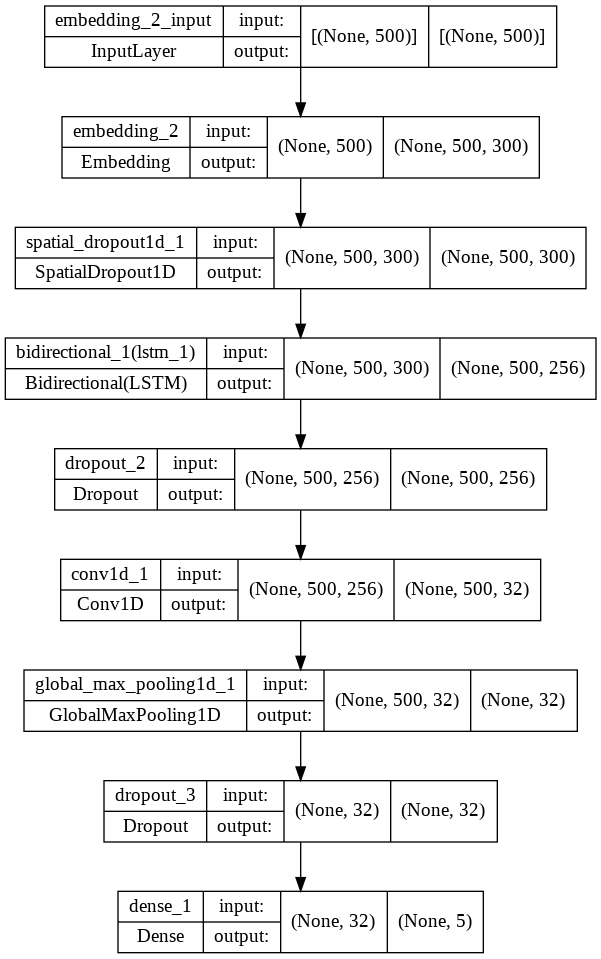

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
from time import time
t1 = time()

batch_size = 512
epochs = 80

print(x_test_seq.shape)
print(y_test.shape)

print(x_train_seq.shape)
print(y_train.shape)

(13802, 500)
(13802, 5)
(13802, 500)
(13802, 5)


In [ ]:
hist = model.fit(x_train_seq, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test_seq,y_test))

Epoch 1/80
27/27 [==============================] - 29s 942ms/step - loss: 1.6163 - accuracy: 0.2560 - val_loss: 1.5934 - val_accuracy: 0.2639
Epoch 2/80
27/27 [==============================] - 24s 898ms/step - loss: 1.5688 - accuracy: 0.2763 - val_loss: 1.5706 - val_accuracy: 0.3070
Epoch 3/80
27/27 [==============================] - 24s 907ms/step - loss: 1.5470 - accuracy: 0.3007 - val_loss: 1.5296 - val_accuracy: 0.3468
Epoch 4/80
27/27 [==============================] - 24s 910ms/step - loss: 1.5215 - accuracy: 0.3253 - val_loss: 1.5212 - val_accuracy: 0.3494
Epoch 5/80
27/27 [==============================] - 24s 910ms/step - loss: 1.5030 - accuracy: 0.3341 - val_loss: 1.4865 - val_accuracy: 0.3689
Epoch 6/80
27/27 [==============================] - 24s 910ms/step - loss: 1.4895 - accuracy: 0.3448 - val_loss: 1.4929 - val_accuracy: 0.3720
Epoch 7/80
27/27 [==============================] - 24s 909ms/step - loss: 1.4874 - accuracy: 0.3465 - val_loss: 1.4701 - val_accuracy: 0.3706

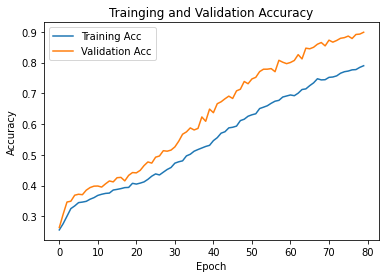

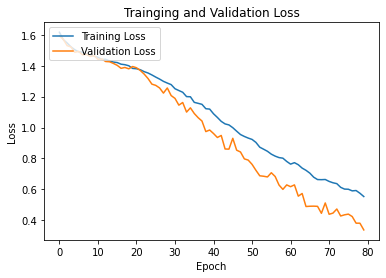

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
import itertools
import matplotlib.pyplot as plt

# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Trainging and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Validation Acc'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Trainging and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x_test_seq)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(data_test.Class, predictions)))

print('Micro Precision: {:.2f}'.format(precision_score(data_test.Class, predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(data_test.Class, predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(data_test.Class, predictions, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(data_test.Class, predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(data_test.Class, predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(data_test.Class, predictions, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(data_test.Class, predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(data_test.Class, predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(data_test.Class, predictions, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(data_test.Class, predictions, target_names=class_names))


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.89
Macro Recall: 0.90
Macro F1-score: 0.89

Weighted Precision: 0.91
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

               precision    recall  f1-score   support

     Positive       0.94      0.85      0.89      3198
Very Positive       0.94      0.88      0.91      2951
     Negative       0.67      0.95      0.79      1445
Very Negative       0.91      0.96      0.93      3928
      Neutral       0.98      0.86      0.92      2280

     accuracy                           0.90     13802
    macro avg       0.89      0.90      0.89     13802
 weighted avg       0.91      0.90      0.90     13802




F1 Score: 89.89


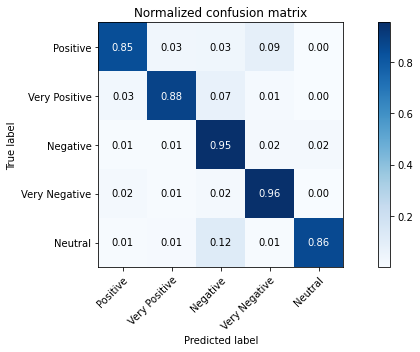

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes=class_names,
                          normalize=False,
                          title=confusion_matrix,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(10, 5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("\nF1 Score: {:.2f}".format(f1_score(data_test.Class, predictions, average='micro') * 100))

plot_confusion_matrix(data_test.Class, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
#plot_confusion_matrix(y_true,y_pred,classes=class_names)
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn import metrics

cm = confusion_matrix(data_test.Class, predictions)

TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))

Sensitivity :  0.9706093189964158
Specificity :  0.9626755358462675
false positive rate :  0.037324464153732445
false negative rate :  0.02939068100358423
Negative Predictive Value :  0.9694826944547823
False Discovery rate :  0.03595585617657529


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,model.predict(x_test_seq)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,model.predict(x_test_seq)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test_seq))))
print('Cohen_Kappa_Score:', cohen_kappa_score(data_test.Class, predictions))

Mean Absolute Error: 0.089461535
Mean Squared Error: 0.034706254
Root Mean Squared Error: 0.18629615
Cohen_Kappa_Score: 0.8711077062881124


In [ ]:
#Positive
import time

message = ['এটা ভুলে গেলে চলবে না যে ব্যাংকটিতে নুতন পরিচালনা পর্ষদ এসেছে তাদের ব্যাংকটির সব কিছু বুঝে উঠতে একটু সময় লাগবে এটাই স্বাভাবিক']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=500)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['এটা ভুলে গেলে চলবে না যে ব্যাংকটিতে নুতন পরিচালনা পর্ষদ এসেছে তাদের ব্যাংকটির সব কিছু বুঝে উঠতে একটু সময় লাগবে এটাই স্বাভাবিক']
predicted: Positive (0.14 seconds)


In [ ]:
#Negative
import time

message = ['বিগত কয়েক বছরের অভিজ্ঞতা বলে ব্যাংকসহ শ্যেনদৃষ্টি যেখানে সর্বনাশ সেখানে']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=500)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['বিগত কয়েক বছরের অভিজ্ঞতা বলে ব্যাংকসহ শ্যেনদৃষ্টি যেখানে সর্বনাশ সেখানে']
predicted: Negative (0.10 seconds)


In [ ]:
#Neutral
import time

message = ['আমি চাইতে সমস্যা কি দাম চাইলাম যা দ্যান']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=500)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['আমি চাইতে সমস্যা কি দাম চাইলাম যা দ্যান']
predicted: Neutral (0.10 seconds)


In [ ]:
#Very Positive
import time

message = ['তাহলে তো রডের দাম আরো কমবে']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=500)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['তাহলে তো রডের দাম আরো কমবে']
predicted: Very Positive (0.10 seconds)


In [ ]:
#Very Negative
import time

message = ['জনসংখ্যা আর আয়তনের হিসাবে পাকিস্তানই বেশী পেয়েছে']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=500)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['জনসংখ্যা আর আয়তনের হিসাবে পাকিস্তানই বেশী পেয়েছে']
predicted: Very Negative (0.11 seconds)
